<a href="https://colab.research.google.com/github/SaiVarma98/EDA-and-Basic-ML-/blob/main/Comcast_telecom_complaints_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing Librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/SaiVarma98/EDA-and-Basic-ML-/main/Comcast_telecom_complaints_data.csv')
print(data)

     Ticket #  ... Filing on Behalf of Someone
0      250635  ...                          No
1      223441  ...                          No
2      242732  ...                         Yes
3      277946  ...                         Yes
4      307175  ...                          No
...       ...  ...                         ...
2219   213550  ...                          No
2220   318775  ...                          No
2221   331188  ...                          No
2222   360489  ...                          No
2223   363614  ...                         Yes

[2224 rows x 11 columns]


In [16]:
# DataSet Analysis
print("Shape of Data is :",data.shape)
print("info of Data :",data.info())
print("\n")
print("Desc of data below :")
print(data.describe())

Shape of Data is : (2224, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB
info of Data : None


Desc of data below :
           Zip code
count 

In [17]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [18]:
# Adding a date time column
datetime_index=pd.to_datetime(data["Date_month_year"]+" "+data["Time"])

In [19]:
data["datetime_index"]=datetime_index
data["Date_month_year"]=pd.to_datetime(data["Date_month_year"])
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime_index
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [20]:
data.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
datetime_index                 datetime64[ns]
dtype: object

In [21]:
data["Date_month_year"].value_counts() 

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-10-05      7
2015-05-24      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

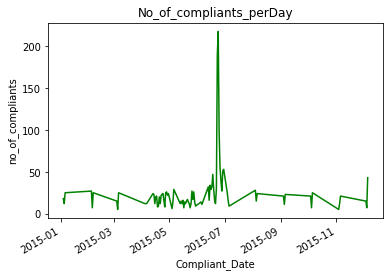

In [22]:
# Ploting Daily Frequencies
data["Date_month_year"].value_counts().plot(xlabel='Compliant_Date',ylabel='no_of_compliants',title='No_of_compliants_perDay',color='g')
plt.show()

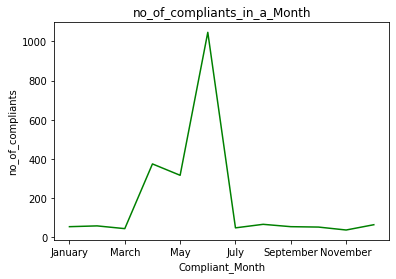

In [24]:
# Plotting Monthly  Frequencies
data.sort_values(by=["Date_month_year"],inplace=True) #ordering data by Datae_month_year
data["Date_month_year"].dt.month_name().value_counts(sort=False).plot(xlabel="Compliant_Month",ylabel="no_of_compliants",title="no_of_compliants_in_a_Month",color='g')
plt.show()

In [25]:
data["Custom_Status"]=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]

In [26]:
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime_index,Custom_Status
1160,211472,comcast cable,04-01-15,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04 10:43:20,Closed
1852,211255,Comcast harassment,04-01-15,2015-01-04,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No,2015-01-04 00:18:47,Closed
1430,211478,Comcast,04-01-15,2015-01-04,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,2015-01-04 10:47:35,Closed
717,212507,Comcast Cable,04-01-15,2015-01-04,3:54:43 PM,Internet,Franklin,Tennessee,37067,Closed,No,2015-01-04 15:54:43,Closed
1992,211784,billing,04-01-15,2015-01-04,12:32:23 PM,Customer Care Call,Stone Mountain,Georgia,30083,Closed,No,2015-01-04 12:32:23,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,337532,Comcast Billing,06-12-15,2015-12-06,4:10:54 PM,Customer Care Call,Jupiter,Florida,33477,Open,Yes,2015-12-06 16:10:54,Open
709,336872,Horrible/Unacceptable Service of Comcast,06-12-15,2015-12-06,12:45:46 PM,Internet,Fort Myers,Florida,33907,Solved,No,2015-12-06 12:45:46,Closed
572,337337,Internet Too Slow,06-12-15,2015-12-06,3:06:04 PM,Internet,Denver,Colorado,80246,Solved,No,2015-12-06 15:06:04,Closed
1476,337209,Billing and slowing of internet,06-12-15,2015-12-06,2:29:57 PM,Internet,Olympia,Washington,98502,Solved,No,2015-12-06 14:29:57,Closed


In [27]:

State_group=data.groupby(["State","Custom_Status"]).size().unstack().fillna(0)  # filling Zeros if data is not there
print(State_group)


Custom_Status         Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   0.0
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   0.0
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   0.0
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   0.0
Nevada                   1.0   0.0
New Hampshire       

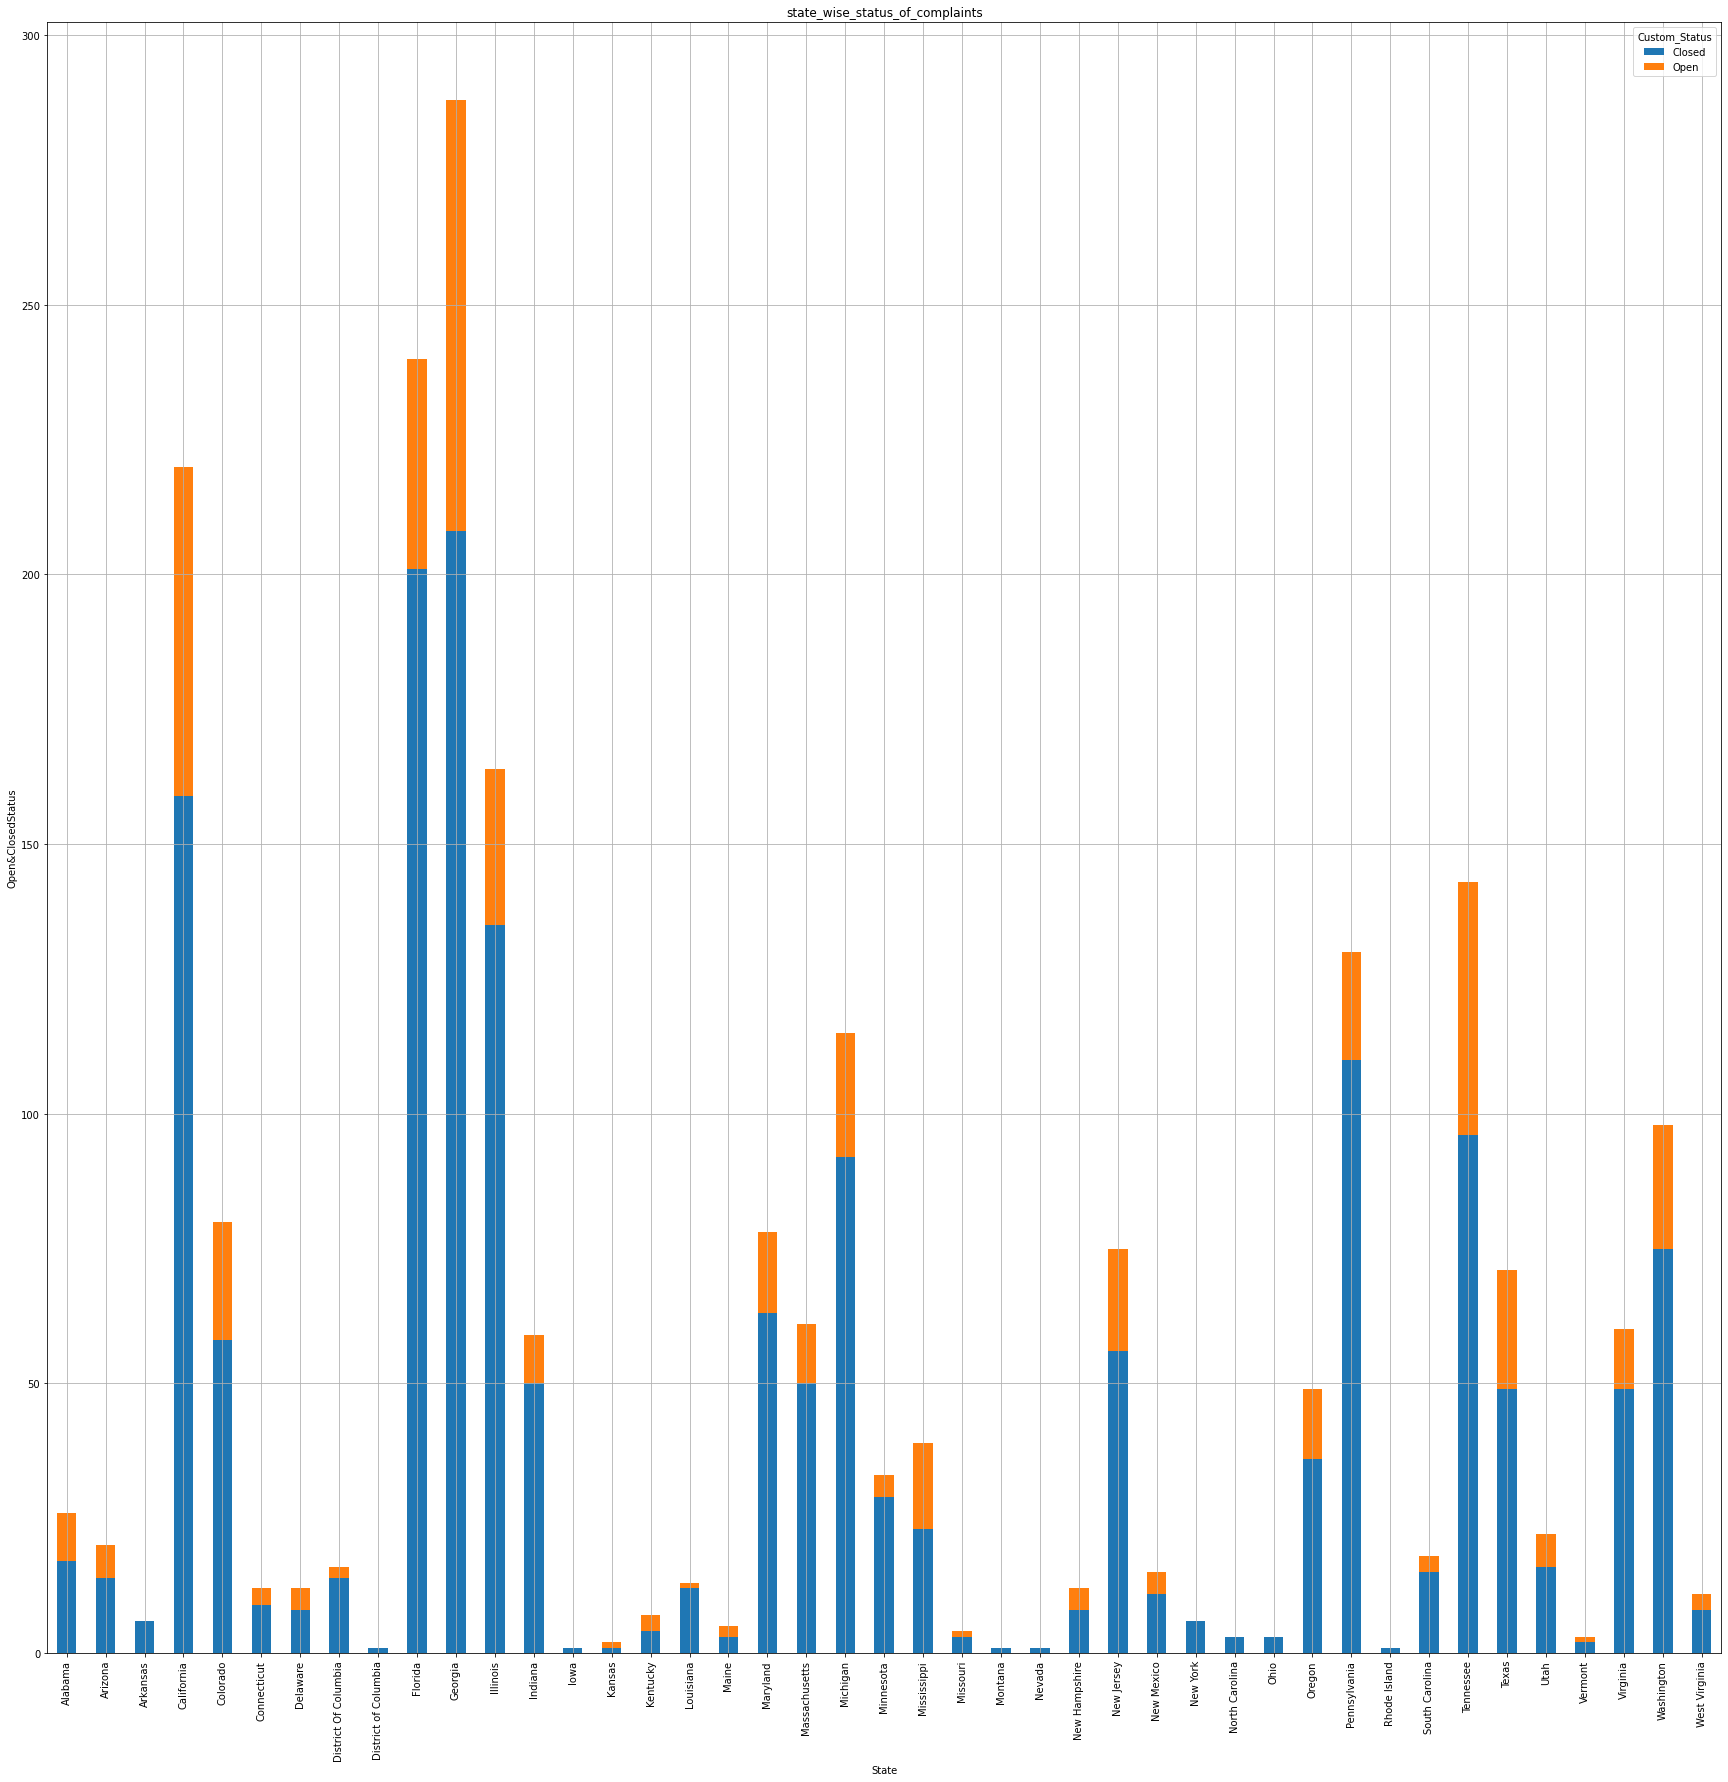

In [28]:
#state wise status of complaints
State_group.plot(kind='bar', stacked=True,figsize=(30,30),grid=True,xlabel="State",ylabel="Open&ClosedStatus",title="state_wise_status_of_complaints")
plt.show()

In [29]:
#State with Maximum Complaints
State_group["Total"]=State_group["Closed"]+State_group["Open"]

print("State with Maximum Compliants is ",State_group["Total"].index.max(),":",State_group["Total"].max())

State with Maximum Compliants is  West Virginia : 288.0


In [30]:

State_group
State_group["unresolved%"]=(State_group["Open"]/State_group["Total"])*100

In [31]:
#state has the highest percentage of unresolved complaints
State_group
print("State with highest % of unresolved Compliants is\n",State_group["unresolved%"].index.max(),":",State_group["unresolved%"].max())

State with highest % of unresolved Compliants is
 West Virginia : 50.0


In [32]:
 #The percentage of complaints resolved till date, which were received through the Internet and customer care calls.
Int_cust_data=data.groupby(["Received Via","Custom_Status"]).size().unstack().fillna(0)

In [33]:
print(Int_cust_data)

Custom_Status       Closed  Open
Received Via                    
Customer Care Call     864   255
Internet               843   262


In [34]:
Int_cust_data["Total"]=Int_cust_data["Closed"]+Int_cust_data["Open"]

In [35]:
Int_cust_data

Custom_Status,Closed,Open,Total
Received Via,,,
Customer Care Call,864,255,1119
Internet,843,262,1105


In [36]:
print("percentage of complaints resolved till date, which were received through the Internet and customer care calls are:")
print(((Int_cust_data["Closed"].sum())/(Int_cust_data["Total"].sum()))*100)

percentage of complaints resolved till date, which were received through the Internet and customer care calls are:
76.75359712230215
